#    The Sparks Foundation

## Graduate Rotational Internship Programme (GRIP) 

### DECEMBER 2022 Batch

# Task 2 : Prediction Using Unsupervised ML 

#### Objective of the Task is to train the ML Model is to predict the optimum number of clusters and represent it visually.

## K-Means Algorithm Problem

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset

df = pd.read_csv('iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,35,4.9,3.1,1.5,0.1,Iris-setosa
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
143,144,6.8,3.2,5.9,2.3,Iris-virginica
119,120,6.0,2.2,5.0,1.5,Iris-virginica
23,24,5.1,3.3,1.7,0.5,Iris-setosa


In [6]:
df.shape

(150, 6)

## EDA

In [7]:
# checking the information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# checking the missing values

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# checking the duplicated values

df.duplicated().sum()

0

In [10]:
# checking the statistical summary of the data

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
# checking the correlation of the given data

df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# Data Visualization

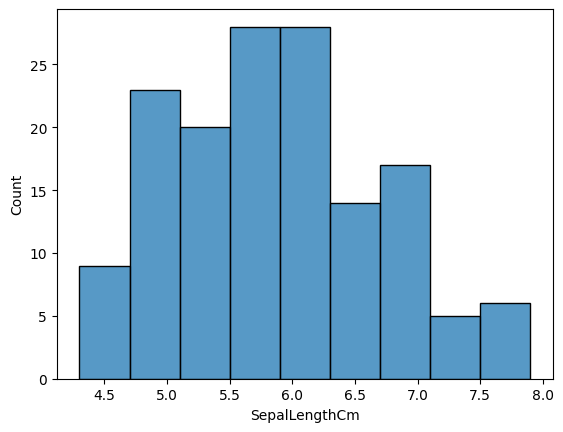

In [12]:
sns.histplot(df['SepalLengthCm'])
plt.show()

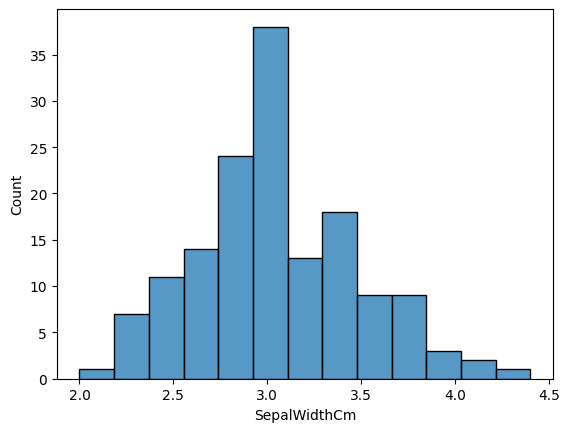

In [13]:

sns.histplot(df['SepalWidthCm'])
plt.show()

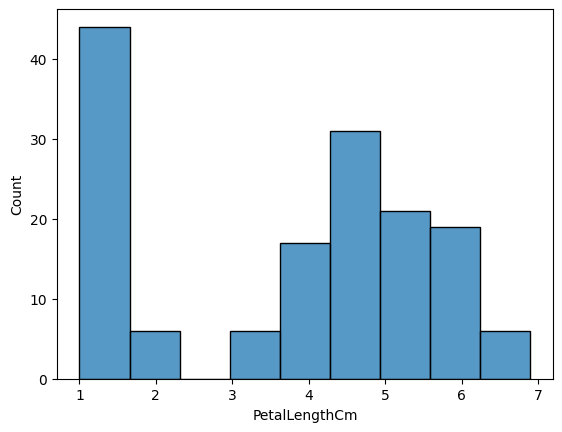

In [14]:
sns.histplot(df['PetalLengthCm'])
plt.show()

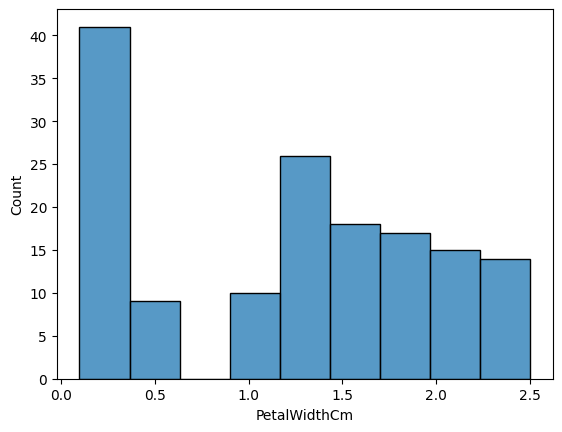

In [15]:
sns.histplot(df['PetalWidthCm'])
plt.show()

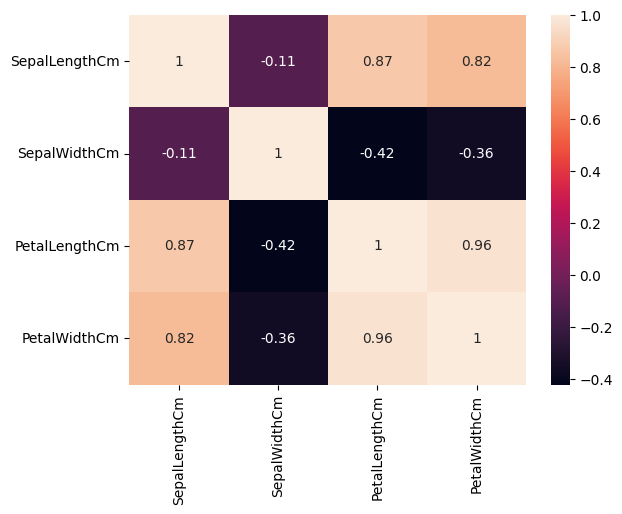

In [16]:
# vizualizating the correlation of iris dataset

df1 = df.drop('Id', axis=1) # dropping the "Id" column

sns.heatmap(df1.corr(), annot=True)
plt.show()

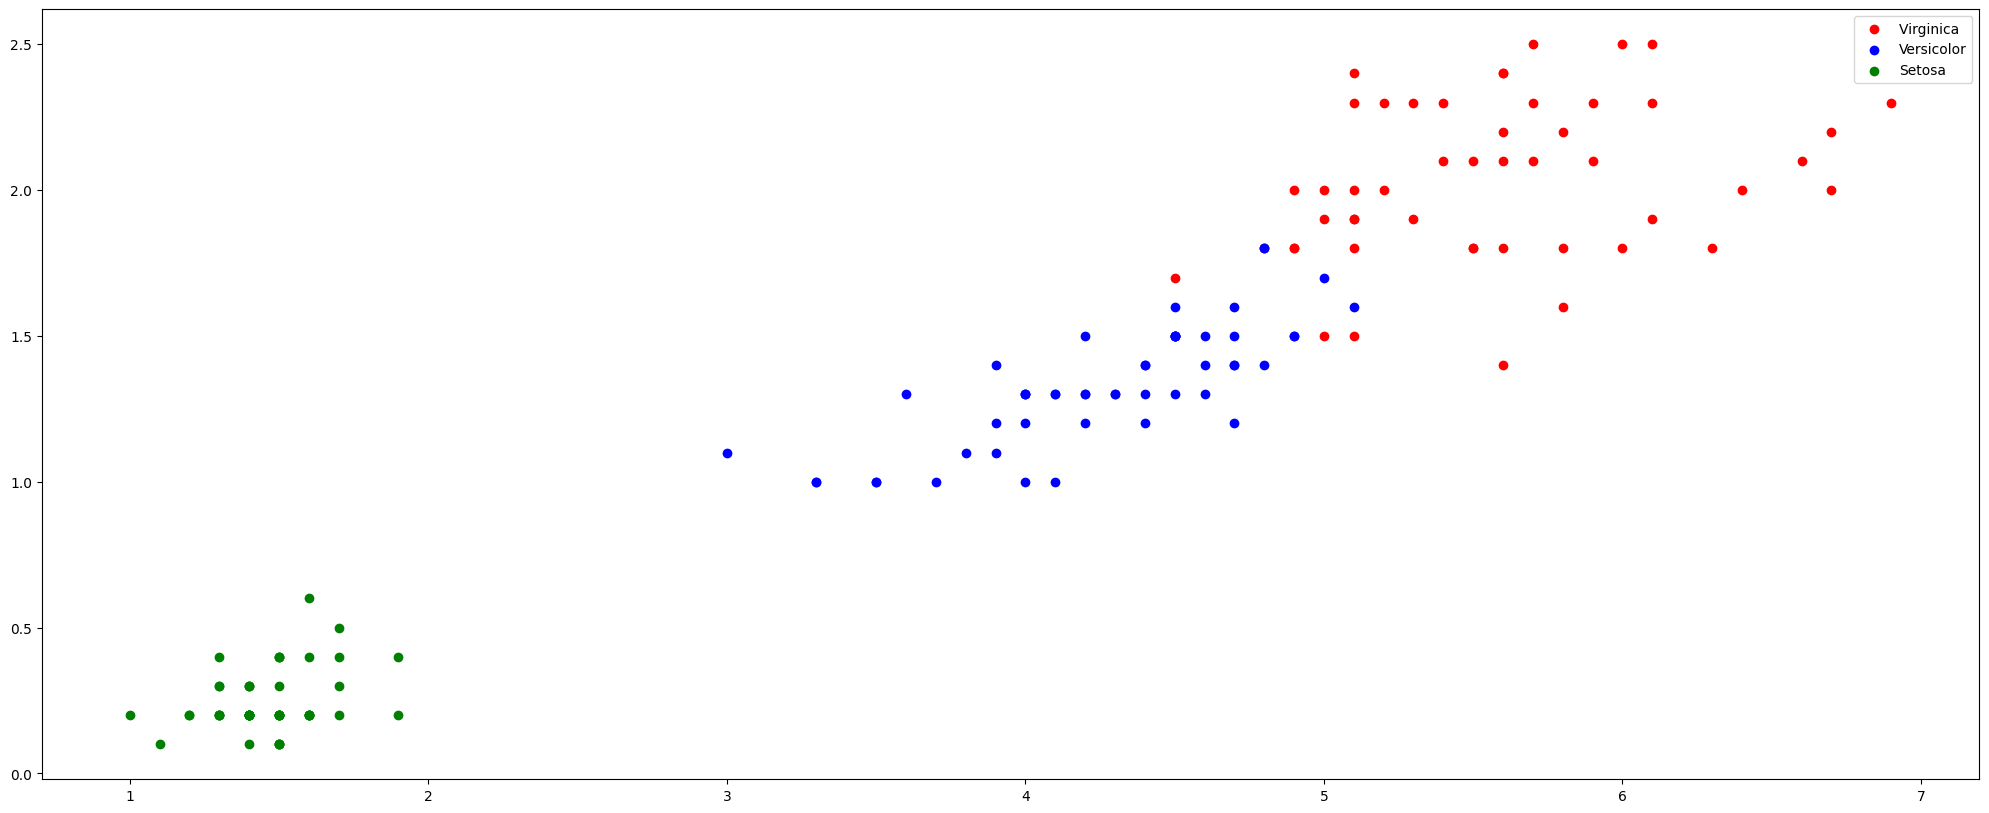

In [17]:
# visualzing the iris data

plt.figure(figsize=(25,10))
seto = df[df['Species']=='Iris-setosa']
vers = df[df['Species']=='Iris-versicolor']
virg = df[df['Species']=='Iris-virginica']

plt.scatter(virg['PetalLengthCm'],virg['PetalWidthCm'], color='red' , label='Virginica ')
plt.scatter(vers['PetalLengthCm'],vers['PetalWidthCm'], color='blue', label='Versicolor')
plt.scatter(seto['PetalLengthCm'],seto['PetalWidthCm'], color='green' , label='Setosa')

plt.legend()
plt.show()

# Model Building

In [18]:
from sklearn.cluster import KMeans

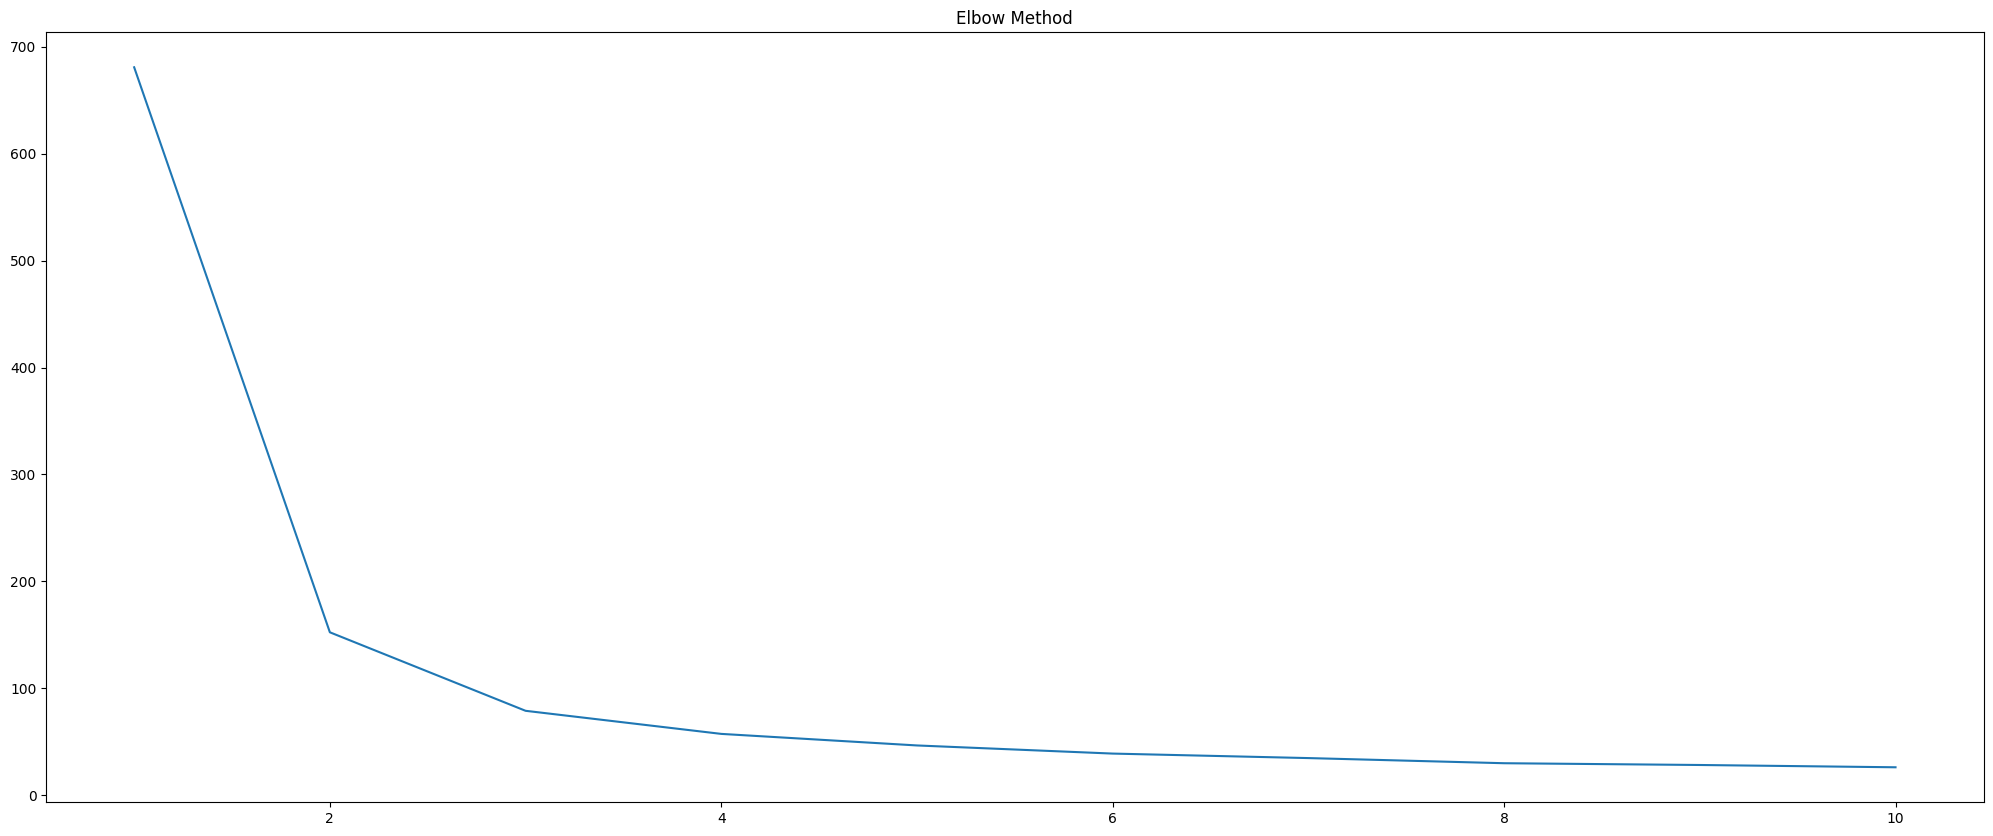

In [19]:
# using elbow method to find out the best cluster

df2 = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

lists = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 51)
    kmeans.fit(df2)
    lists.append(kmeans.inertia_)
    
plt.figure(figsize=(25,10))
plt.plot(range(1, 11), lists)
plt.title('Elbow Method')
plt.show()

#### Best cluster is : 3

In [20]:
# kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 100, n_init = 10, random_state = 51)

In [21]:
# prediction

y_kmeans = kmeans.fit_predict(df2)

In [22]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

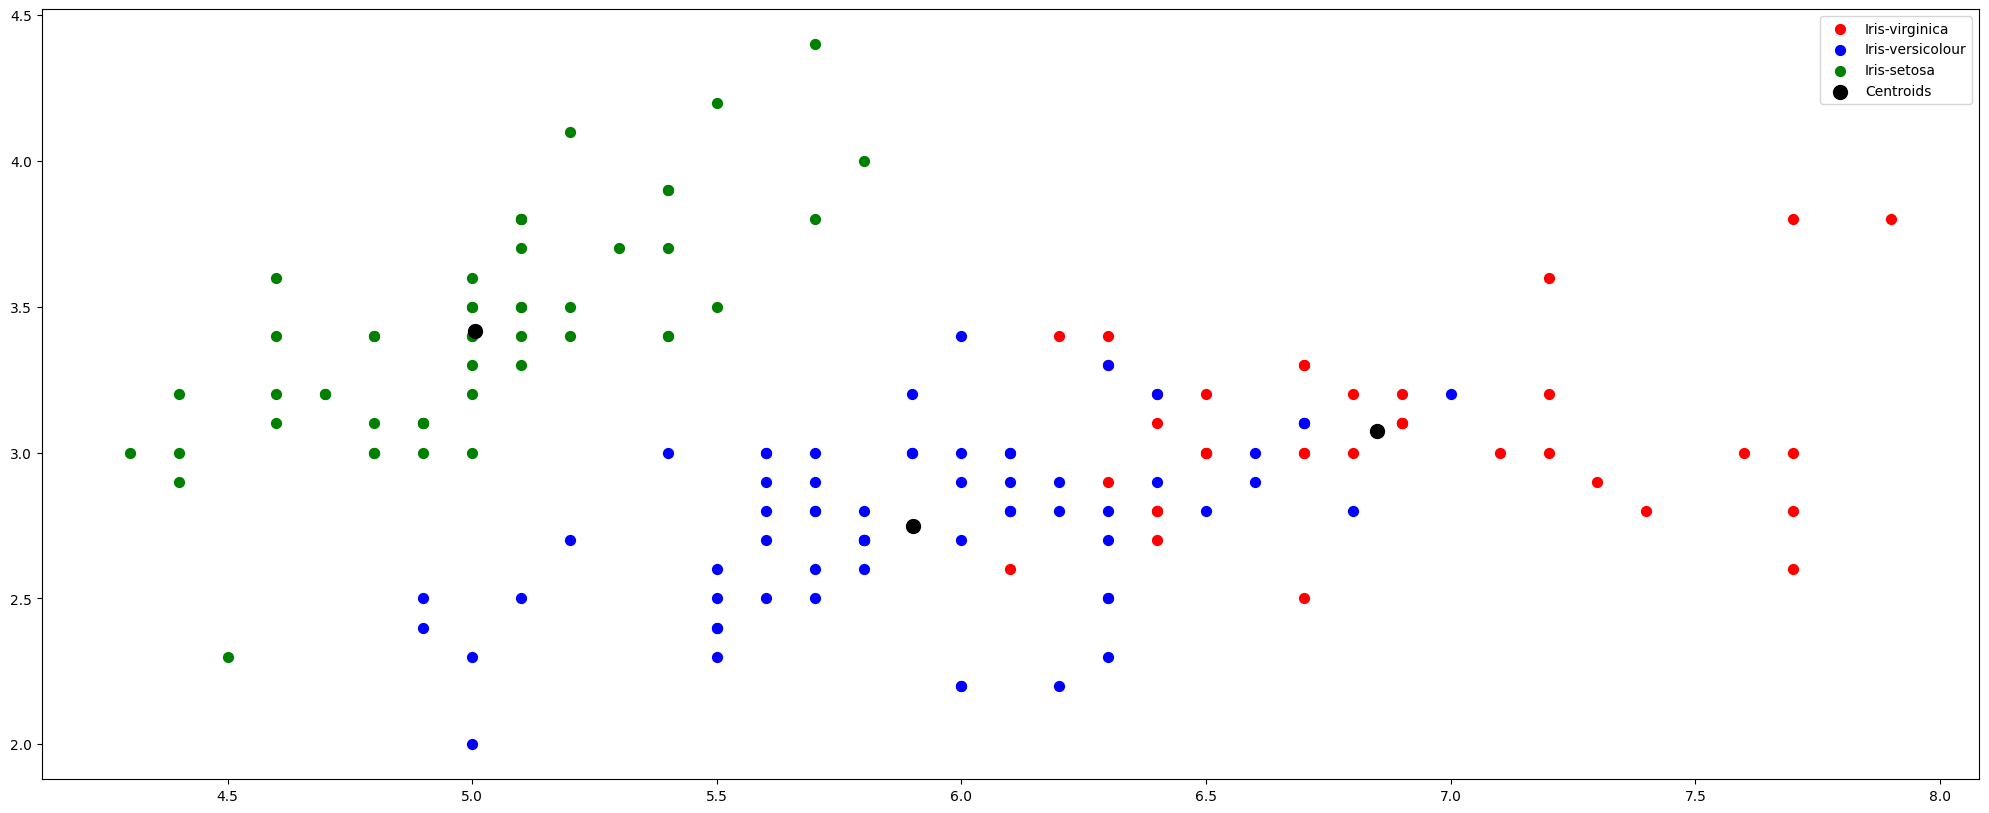

In [23]:
# visualization after training the data 

plt.figure(figsize=(25,10))
plt.scatter(df2[y_kmeans == 2, 0], df2[y_kmeans == 2, 1], s = 50, c = 'red', label = 'Iris-virginica')
plt.scatter(df2[y_kmeans == 1, 0], df2[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(df2[y_kmeans == 0, 0], df2[y_kmeans == 0, 1], s = 50, c = 'green', label = 'Iris-setosa')
#visualizing the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.show()